# PyTorch Basics - GAN for Simple Pattern

Make Your Own GAN, 2019

In [0]:
# import libraries

import torch
import torch.nn as nn

import pandas
import matplotlib.pyplot as plt
import random

## Data Functions

In [0]:
# function to generate real data

def generate_real():
    real_data = torch.FloatTensor(
        [random.uniform(0.8, 1.0),
         random.uniform(0.0, 0.2),
         random.uniform(0.8, 1.0),
         random.uniform(0.0, 0.2)])
    return real_data

In [0]:
# function to generate uniform random data

def generate_random():
    random_data = torch.FloatTensor(
        [random.uniform(0.0, 1.0),
         random.uniform(0.0, 1.0),
         random.uniform(0.0, 1.0),
         random.uniform(0.0, 1.0)])
    return random_data

## Discriminator Network

In [0]:
# discriminator class

class Discriminator(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.model = nn.Sequential(
            nn.Linear(4, 3),
            nn.Sigmoid(),
            nn.Linear(3, 1),
            nn.Sigmoid()
        )
        
        # create loss function
        self.loss_function = nn.MSELoss()

        # create optimiser, simple stochastic gradient descent
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        # counter and accumulator for progress
        self.counter = 0;
        self.progress = []

        pass
    
    
    def forward(self, inputs):
        # simply run model
        return self.model(inputs)
    
    
    def train(self, inputs, targets):
        # calculate the output of the network
        outputs = self.forward(inputs)
        
        # calculate loss
        loss = self.loss_function(outputs, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass
    
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass
    
    pass

## Test Discriminator

In [27]:
# test discriminator can separate real data from random noise

D = Discriminator()

for i in range(10000):
    # real data
    D.train(generate_real(), torch.FloatTensor([1.0]))
    # fake data
    D.train(generate_random(), torch.FloatTensor([0.0]))
    pass

counter =  10000
counter =  20000


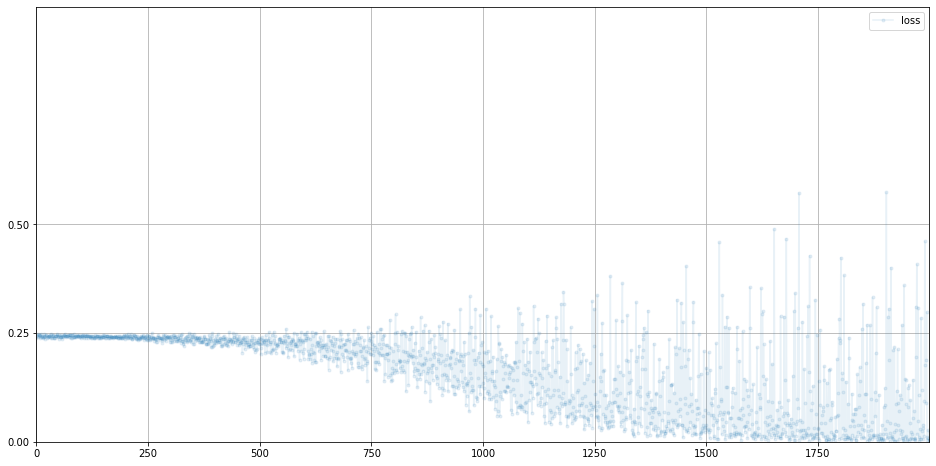

In [28]:
# plot discriminator loss

D.plot_progress()

In [29]:
# manually run discriminator to check it can tell real data from fake

for i in range(4):
  print( D.forward(torch.FloatTensor([0.0, 1.0, 0.0, 1.0])).item() )
  pass

for i in range(4):
  print( D.forward(torch.FloatTensor([1.0, 0.0, 1.0, 0.0])).item() )
  pass

0.02417152374982834
0.02417152374982834
0.02417152374982834
0.02417152374982834
0.8589327931404114
0.8589327931404114
0.8589327931404114
0.8589327931404114
